In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
kp = pd.read_csv('full2017jan.csv')

In [ ]:
test = pd.read_csv('clean.csv')

In [ ]:
kp.isnull().sum()

#YYY      0
MM        0
DD,       0
hh.h      0
hh._m,    0
days_m    0
Kp        0
ap        0
D         0
dtype: int64

In [ ]:
test.isnull().sum()

Unnamed: 0               0
proton_speed             5
proton_density        1246
proton_temperature     109
time                     0
bt                       0
dtype: int64

In [ ]:
kp.head()

,#YYY,MM,"DD,",hh.h,"hh._m,",days_m,Kp,ap,D
0,2017,1,1,0,1.5,31047.0625,3.333,18,1
1,2017,1,1,3,4.5,31047.1875,3.667,22,1
2,2017,1,1,6,7.5,31047.3125,2.667,12,1
3,2017,1,1,9,10.5,31047.4375,2.333,9,1
4,2017,1,1,12,13.5,31047.5625,2.333,9,1


In [ ]:
kp.shape

(249, 9)

In [ ]:
test.head()

,Unnamed: 0,proton_speed,proton_density,proton_temperature,time,bt
0,0,549.7,8.15,134673.0,1.483229e+12,7.242462
1,1,563.8,8.50,158152.0,1.483229e+12,7.319447
2,2,565.0,8.59,161769.0,1.483229e+12,7.173417
3,3,566.5,9.05,171236.0,1.483229e+12,7.223015
4,4,562.0,7.69,129636.0,1.483229e+12,7.278492


In [ ]:
test.tail()

,Unnamed: 0,proton_speed,proton_density,proton_temperature,time,bt
144744,144744,657.2,4.66,105846.0,1.483834e+12,4.611859
144745,144745,640.5,2.90,149110.0,1.483834e+12,4.618090
144746,144746,718.3,4.53,232540.0,1.483834e+12,4.577990
144747,144747,663.5,4.91,111987.0,1.483834e+12,4.560804
144748,144748,675.7,4.50,120085.0,1.483834e+12,4.579598


In [ ]:
test.shape

(144749, 6)

In [ ]:
i = test['time'][0]
j = test['time'][88071]
j-i

#Full timescale calculation
#The range of data in terms of time

366542279.0

In [ ]:
10800000/124387
#3 hours in data frame are equal to 86 or 87 rows

#useless

86.82579369226687

In [ ]:
(j-i)/10800000

#approximation of no. of groups required in fc data

33.93909990740741

##kp shape is 249
##In test df we will replace missing values with mean

In [ ]:
#Data filling

test['proton_density'].fillna(test['proton_density'].mean(), inplace=True)
test['proton_temperature'].fillna(test['proton_temperature'].mean(), inplace=True)
test['proton_speed'].fillna(test['proton_speed'].mean(), inplace=True)
test['bt'].fillna(test['bt'].mean(), inplace=True)

In [ ]:
test.isnull().sum()

Unnamed: 0            0
proton_speed          0
proton_density        0
proton_temperature    0
time                  0
bt                    0
dtype: int64

In [ ]:
new_test = test.drop(columns = ['time', 'Unnamed: 0'], axis=1)

#Dropping useless feature

In [ ]:
new_test.head()

,proton_speed,proton_density,proton_temperature,bt
0,549.7,8.15,134673.0,7.242462
1,563.8,8.50,158152.0,7.319447
2,565.0,8.59,161769.0,7.173417
3,566.5,9.05,171236.0,7.223015
4,562.0,7.69,129636.0,7.278492


In [ ]:
new_test.tail()

,proton_speed,proton_density,proton_temperature,bt
144744,657.2,4.66,105846.0,4.611859
144745,640.5,2.90,149110.0,4.618090
144746,718.3,4.53,232540.0,4.577990
144747,663.5,4.91,111987.0,4.560804
144748,675.7,4.50,120085.0,4.579598


In [ ]:
new_test.shape

(144749, 4)

In [ ]:
88073*3

#Number of elements

264219

In [ ]:
#test_data = new_test.iloc[0:48, 0:3]
#selecting 0 to 47th row and 0 to 2nd indexed column

#Not useful

In [ ]:
#test_data.to_numpy

In [ ]:
# Normalization

from sklearn.preprocessing import StandardScaler
scale =StandardScaler()

In [ ]:
test_scaled =pd.DataFrame(scale.fit_transform(new_test),columns = new_test.columns)
test_scaled.head()

,proton_speed,proton_density,proton_temperature,bt
0,0.107081,0.452357,-0.120015,0.457653
1,0.227625,0.537051,0.028633,0.489109
2,0.237884,0.558830,0.051533,0.429440
3,0.250708,0.670143,0.111470,0.449706
4,0.212236,0.341044,-0.151905,0.472375


In [ ]:
final_kp = kp.drop(['#YYY','MM','DD,','hh.h','hh._m,','days_m','ap','D'], axis=1)
final_kp.head()

,Kp
0,3.333
1,3.667
2,2.667
3,2.333
4,2.333


In [ ]:
final_kp.shape

(249, 1)

In [ ]:
kp_scaled =pd.DataFrame(scale.fit_transform(final_kp),columns = final_kp.columns)
kp_scaled.head()

,Kp
0,1.152948
1,1.435868
2,0.588803
3,0.305883
4,0.305883


##Here on we will use **test_scaled** for training input and **kp_scaled** as output

##10800000 milisecond = 3 hours in UNIX


##final_kp has 49 values

##As 3 hour inputs were required, so 10800000 was added to first unix time stamp and then the nearest time stamp was found.
##Then the index difference is taken i.e Index of higher UNIX Time - Index of Lower UNIX Time
##This difference was used to create chunks of time slots(here it was 2590)
##Hit-n-trial is required to create an appropriate length of 49 chunks or whichever is required
##Try to maximise then length added, but bigger the length(here +2590) less number of chunks and vice-versa

In [ ]:
#Making chunks of data to be linked to Kp index single value

train_arrays = []

for i in range(0, len(test_scaled), 581):
  chunk = test_scaled.iloc[i:i+581]  # Get 2590 rows
  print(len(chunk))
  if len(chunk) == 581:
    train_arrays.append(chunk.values)  # Append the chunk as an array
  else:
    # Handle the chunk with less than 2590 rows (if needed)
    pass
  i+=581

581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
581
80


In [ ]:
len(train_arrays)

249

In [ ]:
len(train_arrays)

249

##Here the chunk with length 67 was not added to the array as can be seen when length is checked

##This is the final Input Array

In [ ]:
train_arrays[0]

array([[ 0.10708097,  0.45235664, -0.12001545,  0.45765252],
       [ 0.22762475,  0.53705123,  0.0286333 ,  0.48910944],
       [ 0.23788379,  0.55882983,  0.05153302,  0.42943984],
       ...,
       [ 0.1669254 ,  0.34830329,  0.05746529,  0.13990067],
       [ 0.15837619,  0.33620407,  0.00168165,  0.17082373],
       [ 0.17205492,  0.27086824, -0.00415565,  0.1500646 ]])

In [ ]:
len(train_arrays)

249

##This is the final Output array

In [ ]:
#y = final_kp.to_numpy()
#This was just a trial

In [ ]:
y = kp_scaled.to_numpy()

In [ ]:
#y = y[:-1]

#To equalise the length of input to output the very last element from y(the kp holding array was removed) - an adhoc method

##**MODEL BUILDING**

In [ ]:
len(train_arrays)

249

In [ ]:
len(y)

249

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(train_arrays,y,test_size =0.2,random_state =42)

In [ ]:
backup_x_test = x_test

In [ ]:
len(x_train)

199

In [ ]:
len(y_train)

199

In [ ]:
# Convert list into array

x_train, y_train = np.array(x_train),np.array(y_train)

In [ ]:
x_train.shape
#40 is training points/data
#2590 is number of timesteps taken
#3 is number of features

(199, 581, 4)

In [ ]:
y_train.shape

(199, 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
# Building LSTM model

model = Sequential()
model.add(LSTM(50, input_shape=(581,4),return_sequences=True))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50,return_sequences=True))
model.add(Dense(units=1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 581, 50)           11000     
                                                                 
 lstm_1 (LSTM)               (None, 581, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 581, 50)           20200     
                                                                 
 lstm_3 (LSTM)               (None, 581, 50)           20200     
                                                                 
 dense (Dense)               (None, 581, 1)            51        
                                                                 
Total params: 71651 (279.89 KB)
Trainable params: 71651 (279.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compiling LSTM model

model.compile(optimizer='adam',loss='mse')

In [ ]:
# training the model
model.fit(x_train,y_train,batch_size=3,epochs=25)

Epoch 1/25
67/67 [==============================] - 16s 63ms/step - loss: 0.9585
Epoch 2/25
67/67 [==============================] - 4s 53ms/step - loss: 0.8895
Epoch 3/25
67/67 [==============================] - 4s 52ms/step - loss: 0.8238
Epoch 4/25
67/67 [==============================] - 4s 63ms/step - loss: 0.7710
Epoch 5/25
67/67 [==============================] - 4s 52ms/step - loss: 0.7843
Epoch 6/25
67/67 [==============================] - 4s 53ms/step - loss: 0.7658
Epoch 7/25
67/67 [==============================] - 4s 63ms/step - loss: 0.7161
Epoch 8/25
67/67 [==============================] - 4s 52ms/step - loss: 0.7213
Epoch 9/25
67/67 [==============================] - 3s 52ms/step - loss: 0.7299
Epoch 10/25
67/67 [==============================] - 4s 58ms/step - loss: 0.7076
Epoch 11/25
67/67 [==============================] - 4s 56ms/step - loss: 0.6975
Epoch 12/25
67/67 [==============================] - 3s 52ms/step - loss: 0.6919
Epoch 13/25
67/67 [=================

In [ ]:
len(y_test)


50

In [ ]:
# Convert list of arrays to a single numpy array
x_test = np.array(x_test)

# Reshape the array
x_test = x_test.reshape((len(x_test), 581, 4))


In [ ]:
len(x_test)

50

2/2 [==============================] - 1s 63ms/step


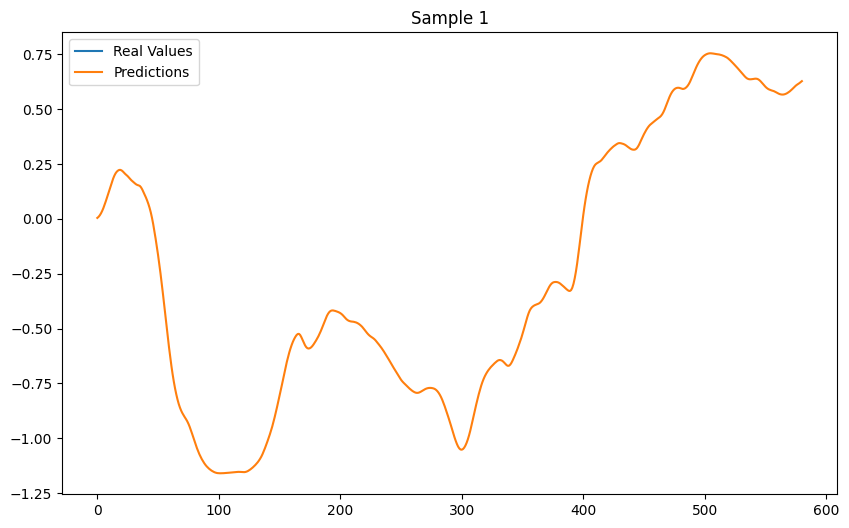

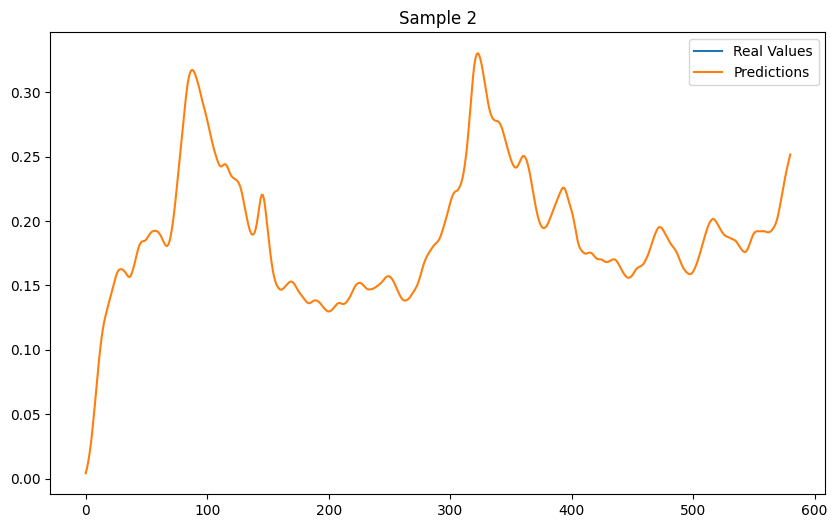

In [ ]:
y_pred = model.predict(x_test)
"""
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Real Values')
plt.plot(y_pred, label='Predictions')
plt.legend()
plt.show()"""
#The lower one is working but only for 1st index
"""y_test_reshaped = y_test[:,-1]  # Assuming you want the first time step prediction
y_pred_reshaped = y_pred[:,-1]  # Assuming you want the first time step prediction

plt.figure(figsize=(10, 6))
plt.plot(y_test_reshaped, label='Real Values')
plt.plot(y_pred_reshaped, label='Predictions')
plt.legend()
plt.show()"""
#The below code plots every point from prediction to y_test
"""
plt.figure(figsize=(10, 6))
for i in range(len(y_test)):
    plt.plot(y_test[i], label=f'Real Values - Sample {i+1}')
    plt.plot(y_pred[i], label=f'Predictions - Sample {i+1}')

plt.legend()
plt.show()"""

# Assuming y_test and y_pred have shapes (249, 2928, 1)
for i in range(2):
    plt.figure(figsize=(10, 6))
    plt.plot(y_test[i], label='Real Values')
    plt.plot(y_pred[i], label='Predictions')
    plt.title(f'Sample {i+1}')
    plt.legend()
    plt.show()

In [ ]:
y_test.shape

(50, 1)

In [ ]:
y_pred.shape

(50, 581, 1)

In [ ]:
y_pred[0].shape

(581, 1)

In [ ]:
bruh = [sum(i[:])/len(i[:]) for i in y_pred]
bruh=np.array(bruh)
bruh = bruh.reshape((len(bruh),1))
bruh.shape

(50, 1)

In [ ]:
# check = pd.DataFrame([i[0] for i in y_test], bruh)

In [ ]:
check

In [ ]:
"""loss = model.history.history['loss']

plt.figure(figsize=(10, 6))
plt.plot(loss, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show() """

In [ ]:
model.save('KpLSTM.h5')

In [ ]:
#Model Testing
""" TO BE DECIDED

# Assuming `X_train` and `y_train` are your training data
# Assuming `model` is your trained LSTM model

# Use the model to make predictions on the training data
y_pred = model.predict(x_train)

# Calculate Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_train, y_pred)

# Calculate Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_train, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
 """

##Making a Model Prediction

In [ ]:
""" Undecided Part

from tensorflow.keras.models import load_model

# Assuming `model_path` is the path where your pre-trained model is saved
model_path = '/content/KpLSTM.h5'

# Load the pre-trained model
pretrained_model = load_model(model_path) """


In [ ]:
"""
import numpy as np

# Assuming `input_data` is your single time step data with 3 features
input_data = np.array([[0.328424,	0.327905,	-0.059465]])  # Replace with actual values

# Repeat the single time step data to create a sequence with 2590 time steps
input_data_repeated = np.tile(input_data, (2590, 1))

# Use the pre-trained model to make a prediction
prediction = pretrained_model.predict(input_data_repeated) """
